In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

from wordcloud import WordCloud
from nltk.corpus import stopwords 

path = '../data/original_data/'

# Business

In [17]:
business = pd.read_json(path + 'yelp_academic_dataset_business.json', lines=True)
business = business.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,12]]
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


In [18]:
business.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


### Location

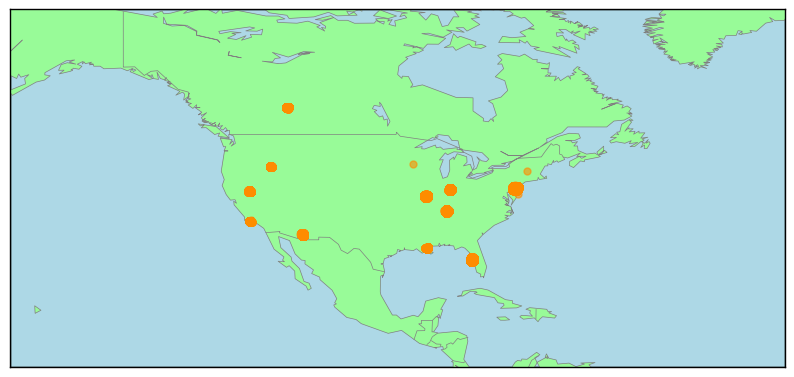

In [19]:
fig = plt.figure(figsize=(10, 8))
plt_frame = fig.add_subplot(1, 1, 1, frame_on=False)
map_view = Basemap(projection='cyl', resolution='c', 
                   llcrnrlat=10, urcrnrlat=70, 
                   llcrnrlon=-160, urcrnrlon=-30)
map_view.drawcoastlines(linewidth=0.5, color='gray')
map_view.fillcontinents(color='palegreen', lake_color='lightblue')
map_view.drawcountries(linewidth=0.5, color='gray')
map_view.drawmapboundary(fill_color='lightblue')
latitude_vals = business['latitude'].tolist()
longitude_vals = business['longitude'].tolist()
mapped_x, mapped_y = map_view(longitude_vals, latitude_vals)
map_view.scatter(mapped_x, mapped_y, color='darkorange', s=25, alpha=0.6, zorder=5)
plt.show()

Total unique cities: 1416


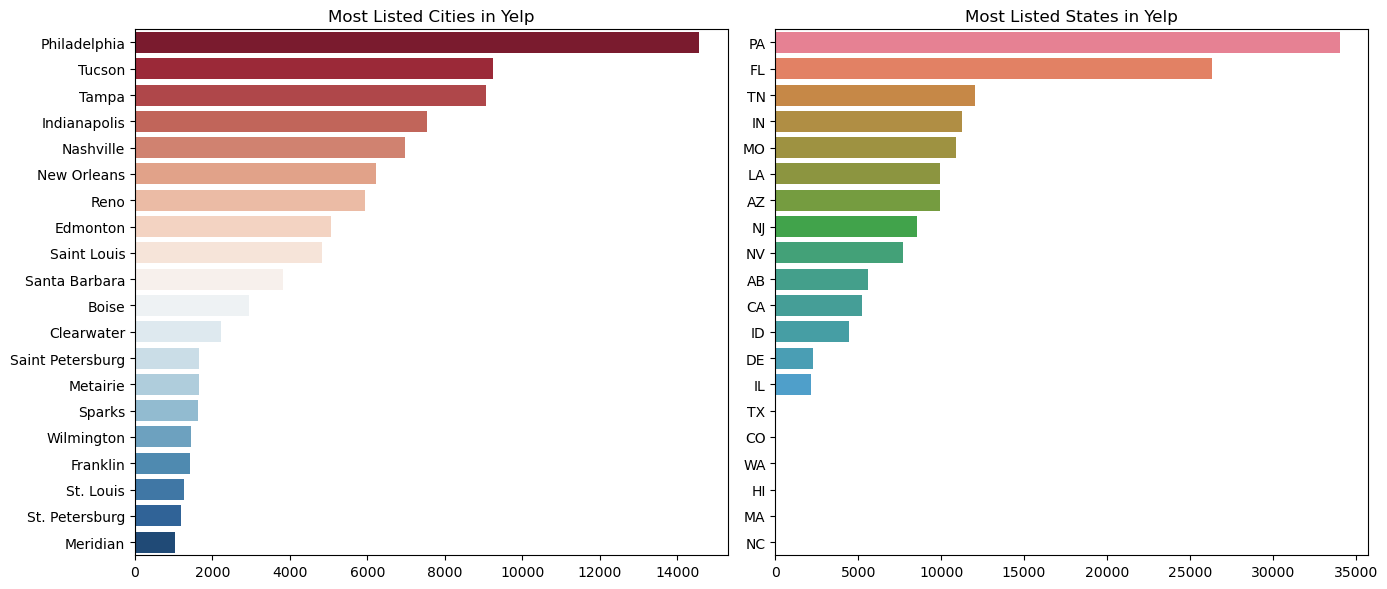

In [20]:
unique_city_count = business['city'].nunique()
print(f'Total unique cities: {unique_city_count}')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
city_axis, state_axis = axes
top_cities = business['city'].value_counts().head(20)
sns.barplot(y=top_cities.index, x=top_cities.values, palette='RdBu', ax=city_axis)
city_axis.set_xlabel('')
city_axis.set_title('Most Listed Cities in Yelp')
top_states = business['state'].value_counts().head(20)
sns.barplot(y=top_states.index, x=top_states.values, palette='husl', ax=state_axis)
state_axis.set_xlabel('')
state_axis.set_title('Most Listed States in Yelp')
plt.tight_layout()
plt.show()

### Polular Business

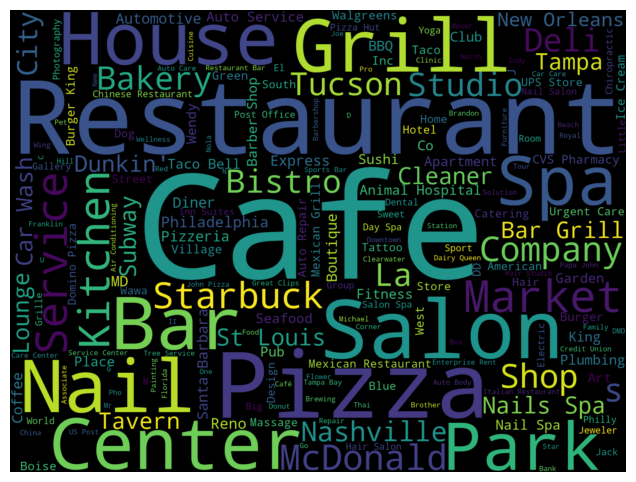

In [21]:
one_name = ' '.join(business['name'].astype(str))
word_cloud_generator = WordCloud(width=1440, height=1080, max_words=200)
word_cloud = word_cloud_generator.generate(one_name)
plt.figure(figsize=(8, 6)) 
plt.imshow(word_cloud, interpolation='bilinear')  
plt.axis('off') 
plt.show()

### Favourite Store Name

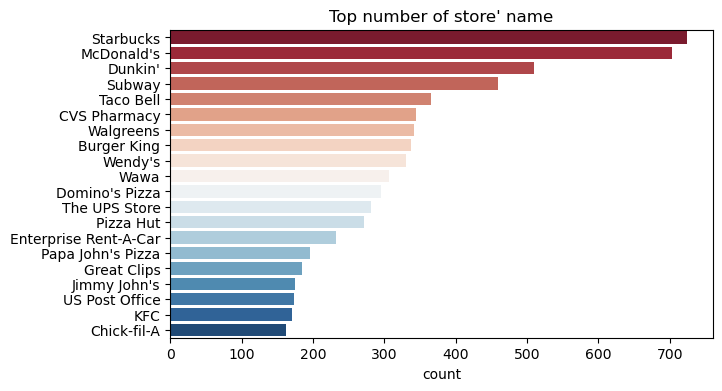

In [22]:
f, ax = plt.subplots(1, 1, figsize=(7, 4))
cnt = business['name'].value_counts()[:20].to_frame()
sns.barplot(x=cnt['name'], y=cnt.index, palette='RdBu', ax=ax)
ax.set_xlabel('count')
ax.set_title('Top number of store\' name')
plt.subplots_adjust(wspace=0.3)

### Distribution of rating

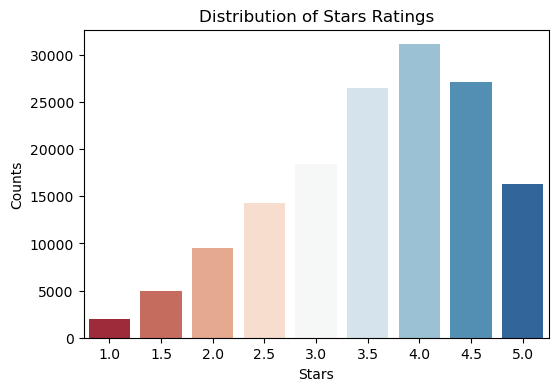

In [23]:
value_counts = business['stars'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index, y=value_counts.values,palette='RdBu')
plt.title('Distribution of Stars Ratings')
plt.xlabel('Stars')
plt.ylabel('Counts')
plt.show()

### Review count

In [24]:
print('Mean review_count',business['review_count'].mean())
print('Median review_count',business['review_count'].median())

Mean review_count 44.86656113232144
Median review_count 15.0


### Categotry

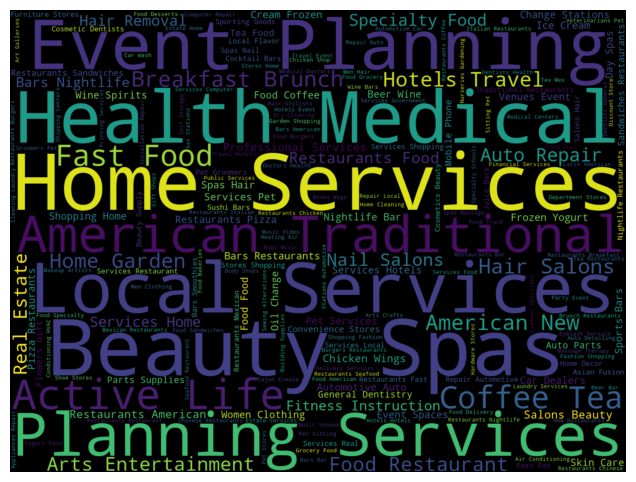

In [25]:
all_categories = ' '.join(business['categories'].astype(str))
word_cloud_generator = WordCloud(width=1440, height=1080, max_words=200)
word_cloud = word_cloud_generator.generate(all_categories)
plt.figure(figsize=(8, 6)) 
plt.imshow(word_cloud, interpolation='bilinear')  
plt.axis('off') 
plt.show()

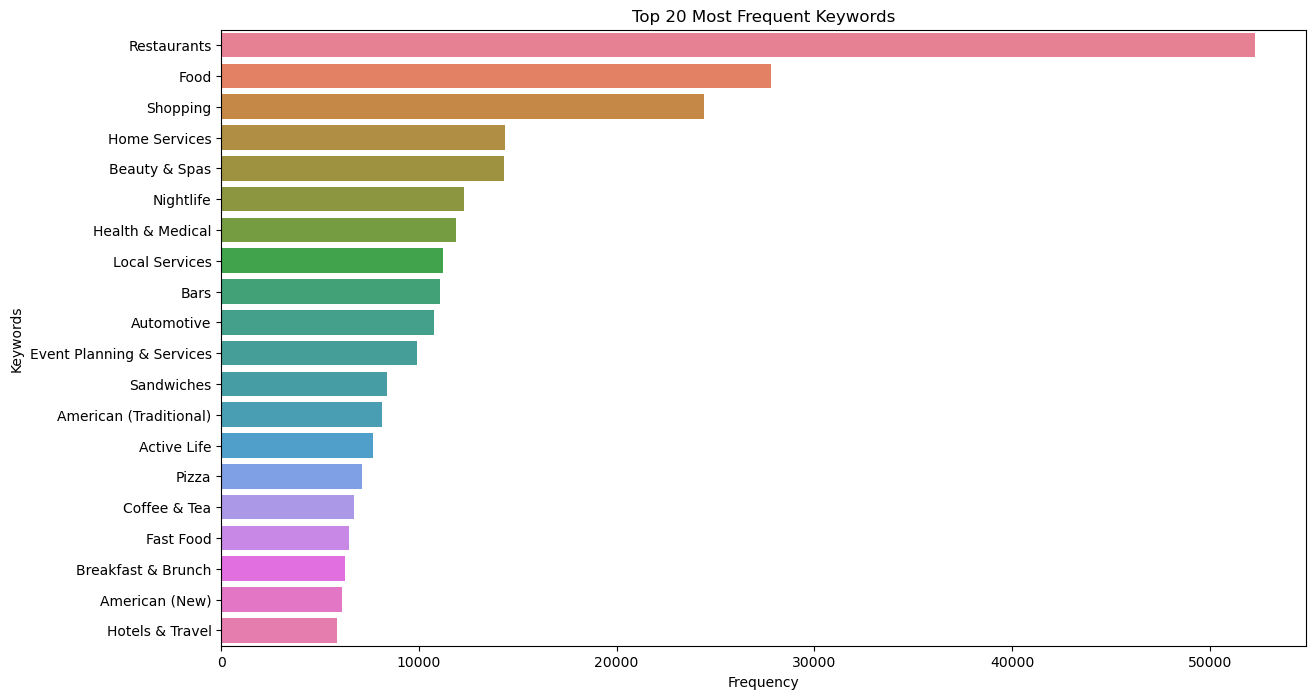

In [26]:
business['categories'].fillna('', inplace=True)
unique_keywords = business['categories'].str.split(', ').apply(lambda x: set(x)).explode()

# 统计每个关键词出现的次数
keyword_counts = unique_keywords.value_counts()
top_keywords = keyword_counts.head(20)
# 绘制条形图
plt.figure(figsize=(14, 8))
sns.barplot(x=top_keywords.values, y=top_keywords.index, palette='husl')
plt.title('Top 20 Most Frequent Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.show()

# Tips

In [27]:
tips = pd.read_json(path + 'yelp_academic_dataset_tip.json', lines=True)
tips.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


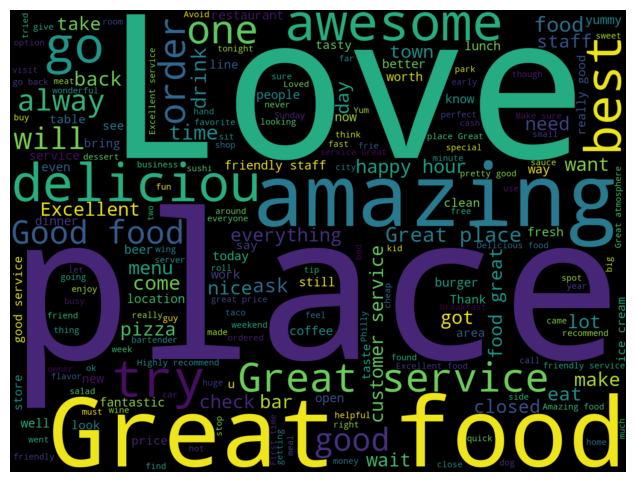

In [28]:
one_tip = ' '.join(tips['text'].astype(str))
word_cloud_generator = WordCloud(width=1440, height=1080, max_words=200)
word_cloud = word_cloud_generator.generate(one_tip)
plt.figure(figsize=(8, 6)) 
plt.imshow(word_cloud, interpolation='bilinear')  
plt.axis('off') 
plt.show()